# 1. Background Introduction

The high quality of education in the United States attracts students from all over the world. Is it better to choose a less popular major based on your interests? Or choose a major that is easier to find a high-paid job? I'm sure many students have had similar confusions before.

Last year，when I worked for a Chinese newspaper as a journalist in Silicon Valley. I covered a story about a software development major student who had been unemployed for one year after graduated from San Jose state university.

(Here is the link to my article, unfortuanatly, it is in Chinese: https://www.worldjournal.com/6675662/article-%E8%BB%9F%E4%BB%B6%E5%B7%A5%E7%A8%8B%E7%95%A2%E6%A5%AD%E7%94%9F-%E5%98%86%E5%B7%A5%E4%BD%9C%E9%9B%A3%E6%89%BE/)

I was suprised that the so-called "good major" is not really that easy for every one to get a high-paid job.This article also attracted widespread public concern. Our readers were interested in the topic of how to choose a college major. What majors are likely to get higher salaries?What majors are easier to find a job? Does study for a STEM major mean a higher salary？Will a graduate degree increase our salary?

I decided to use the data analysis knowledge I had learned to find out the internal connection between major choice and employment situation.

There are five .csv files for data analysts to do the research. All data is from American Community Survey. 

In [4]:
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import seaborn as sns
import squarify

plt.rcParams["figure.figsize"] = (23,8)

In [5]:
allages_df = pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/data/master/college-majors/all-ages.csv")
grad_df = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/college-majors/grad-students.csv')
major_df = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/college-majors/majors-list.csv')
resentgrad_df = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/college-majors/recent-grads.csv')
stem_df = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/college-majors/women-stem.csv')

In [6]:
resentgrad_df.shape

resentgrad_df.tail(10)

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
163,164,6102,COMMUNICATION DISORDERS SCIENCES AND SERVICES,38279.0,1225.0,37054.0,Health,0.967998,95,29763,...,13862,14460,1487,0.047584,28000,20000,40000,19957,9404,5125
164,165,2307,EARLY CHILDHOOD EDUCATION,37589.0,1167.0,36422.0,Education,0.968954,342,32551,...,7001,20748,1360,0.040105,28000,21000,35000,23515,7705,2868
165,166,2603,OTHER FOREIGN LANGUAGES,11204.0,3472.0,7732.0,Humanities & Liberal Arts,0.690111,56,7052,...,3685,3214,846,0.107116,27500,22900,38000,2326,3703,1115
166,167,6001,DRAMA AND THEATER ARTS,43249.0,14440.0,28809.0,Arts,0.666119,357,36165,...,15994,16891,3040,0.077541,27000,19200,35000,6994,25313,11068
167,168,3302,COMPOSITION AND RHETORIC,18953.0,7022.0,11931.0,Humanities & Liberal Arts,0.629505,151,15053,...,6612,7832,1340,0.081742,27000,20000,35000,4855,8100,3466
168,169,3609,ZOOLOGY,8409.0,3050.0,5359.0,Biology & Life Science,0.637293,47,6259,...,2190,3602,304,0.046320,26000,20000,39000,2771,2947,743
169,170,5201,EDUCATIONAL PSYCHOLOGY,2854.0,522.0,2332.0,Psychology & Social Work,0.817099,7,2125,...,572,1211,148,0.065112,25000,24000,34000,1488,615,82
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,...,648,1293,368,0.149048,25000,25000,40000,986,870,622
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,...,965,2738,214,0.053621,23400,19200,26000,2403,1245,308
172,173,3501,LIBRARY SCIENCE,1098.0,134.0,964.0,Education,0.877960,2,742,...,237,410,87,0.104946,22000,20000,22000,288,338,192


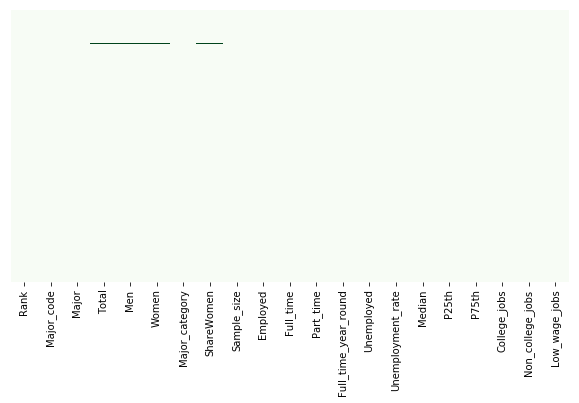

In [7]:
# Check missing values
resentgrad_df.isnull().sum()

plt.subplots(figsize=(10, 5))
sns.heatmap(resentgrad_df.isnull(),cmap='Greens', yticklabels=False, cbar=False)
plt.show()

Since the missing values only involve the number of students in a certain major, we can still study the salary of that major, so I decided not to delete the missing value in this dataset.

In [8]:
resentgrad_df['Major'].value_counts()

OCEANOGRAPHY                                 1
PETROLEUM ENGINEERING                        1
SOCIOLOGY                                    1
ZOOLOGY                                      1
ENGINEERING MECHANICS PHYSICS AND SCIENCE    1
                                            ..
MISCELLANEOUS EDUCATION                      1
ENVIRONMENTAL ENGINEERING                    1
GENERAL SOCIAL SCIENCES                      1
MULTI/INTERDISCIPLINARY STUDIES              1
ADVERTISING AND PUBLIC RELATIONS             1
Name: Major, Length: 173, dtype: int64

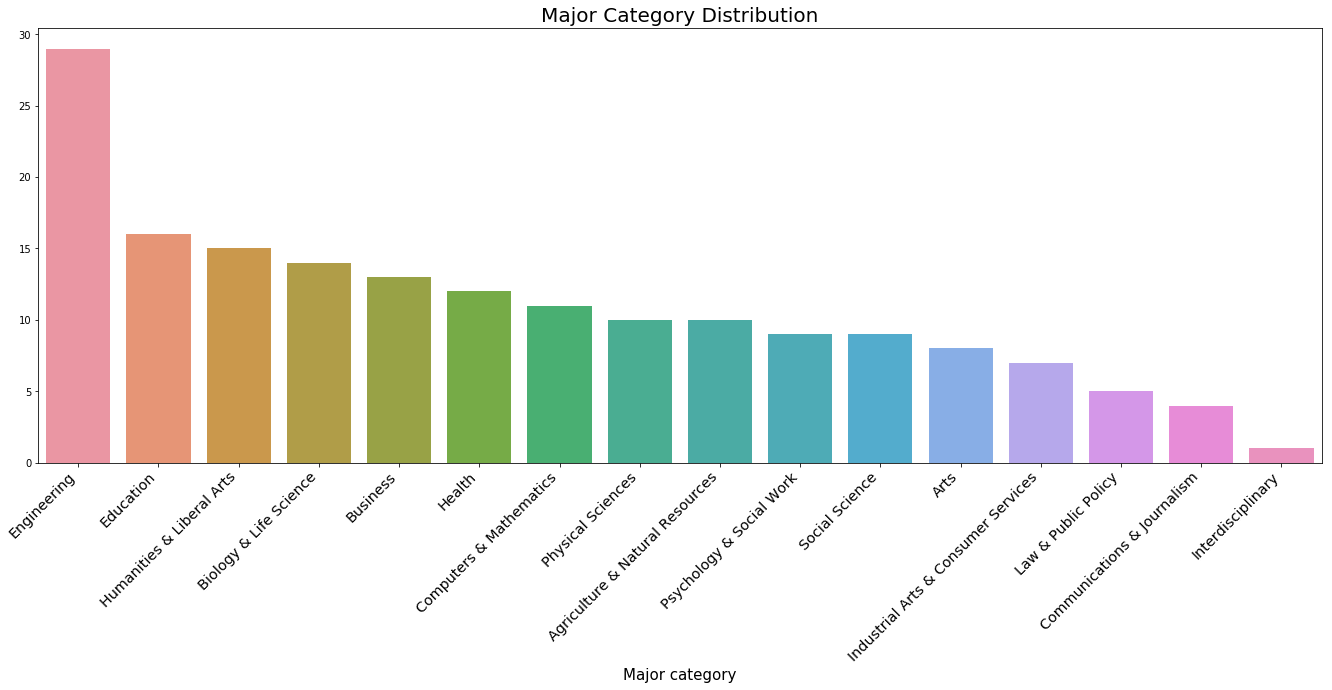

In [9]:
cate = sns.countplot(x = 'Major_category', data = allages_df, order=allages_df['Major_category'].value_counts(ascending=False).index)
plt.title ('Major Category Distribution',size = 20)
plt.xlabel('Major category',size=15)
plt.ylabel('', size=15)
cate.set_xticklabels(cate.get_xticklabels(),rotation=45,horizontalalignment='right',fontweight='light',fontsize='x-large')
plt.show()

* There are 173 rows and 21 columns in the resent graduates dataset. 
* 173 unique majors belong to 16 major categories.
* Engineering is the largest major category, including almost 30 majors.Followed by education, humanities & liberal arts, biology & life science, etc. 

In [10]:
resentgrad_df.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,172.000000,172.000000,172.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.000000,3879.815029,39370.081395,16723.406977,22646.674419,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,63483.491009,28122.433474,41057.330740,0.231205,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,4549.750000,2177.500000,1778.250000,0.336026,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,15104.000000,5434.000000,8386.500000,0.534024,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,38909.750000,14631.000000,22553.750000,0.703299,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


From the table above, I found that the unemployment rate ranges from 0% to 17.72%. I would like to find out what majors have higher unemployment rate and what majors are not? The median wage also ranges from \\$22000 to \\$110000. What majors get higher salaries? I am also curious about what majors have big salary gap (P75th - P25th)?

* There are more female students than male students overall.

* The average unemployment rate is 6.82%.
* The average median salary for all majors is \\$40151.

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5]),
 <a list of 19 Text yticklabel objects>)

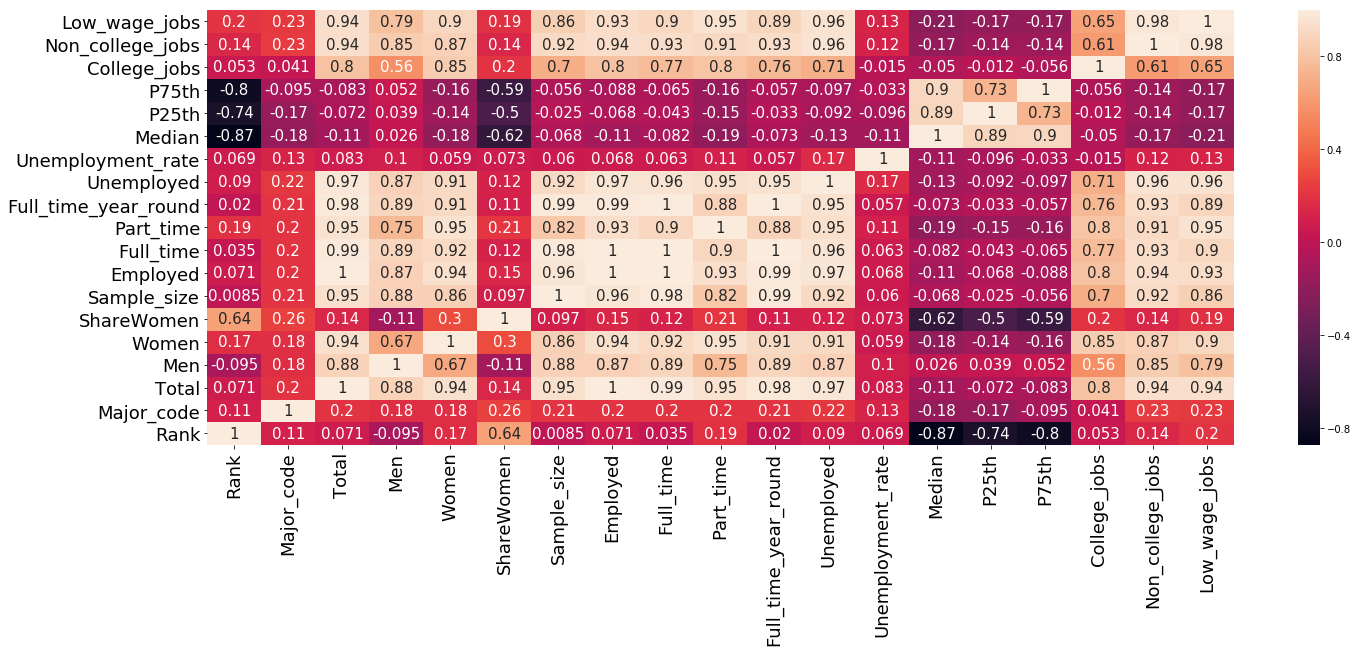

In [11]:
# Plot correlation heatmap

sns.heatmap(resentgrad_df.corr(),annot=True, annot_kws={"size":15})
plt.ylim([0,19])
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

This heatmap shows the correlation coefficients of each feature with respect to one another. When it closes to 1 means very strong correlationship, while 0 means no correlationship.

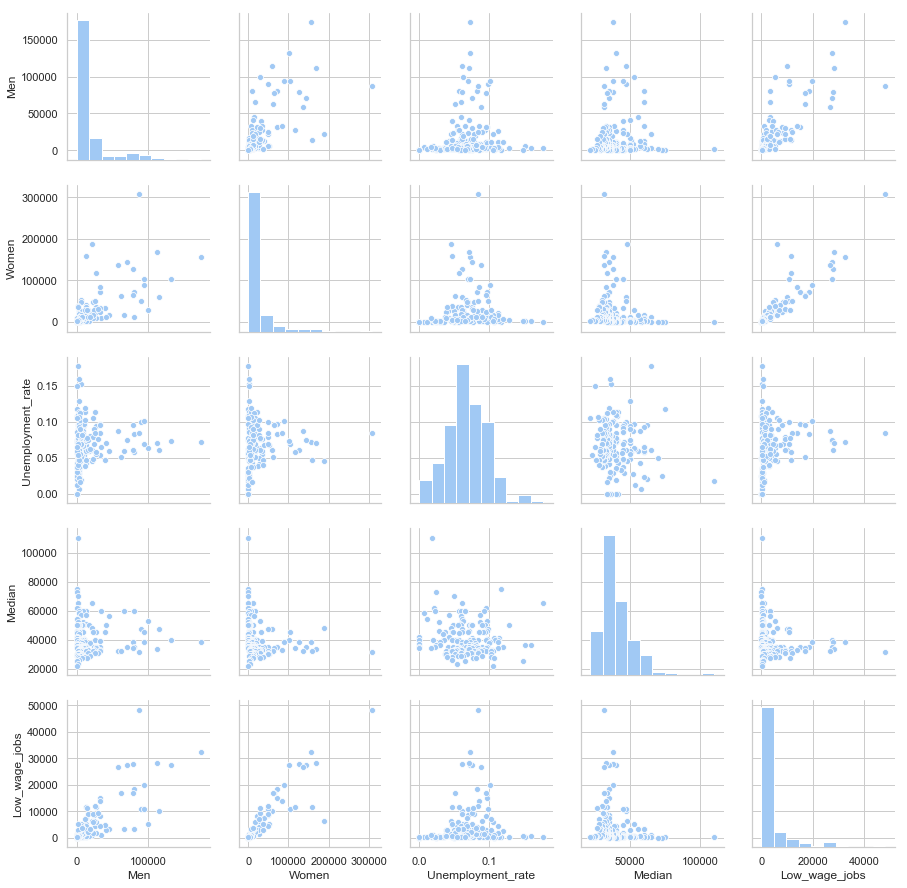

In [36]:
sns.pairplot(resentgrad_df[['Men','Women','Unemployment_rate','Median','Low_wage_jobs']])
plt.show()

# 2. Learn about the employment situation of new graduates

### The median of the median salary for all majors is around \\$36000

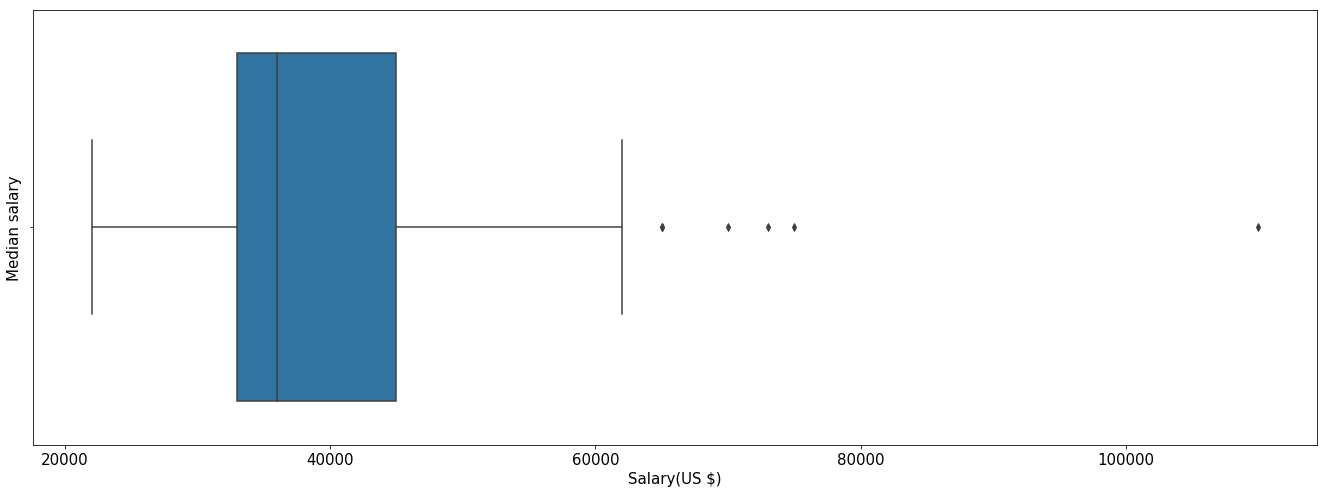

In [13]:
# Use boxplot to explore median salary
sns.boxplot(x = resentgrad_df['Median'])
plt.xlabel('Salary(US $)',size=15)
plt.ylabel('Median salary', size=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

* The median of recent graduated students earned around \\$36000 from this boxplot. 
* Some outliers in the box plot which means some students earned more than most graduates with very high salary.

###  Students in arts or psychology & social work major categories earn least

Text(0.5, 1.0, 'Median salary of different major categories')

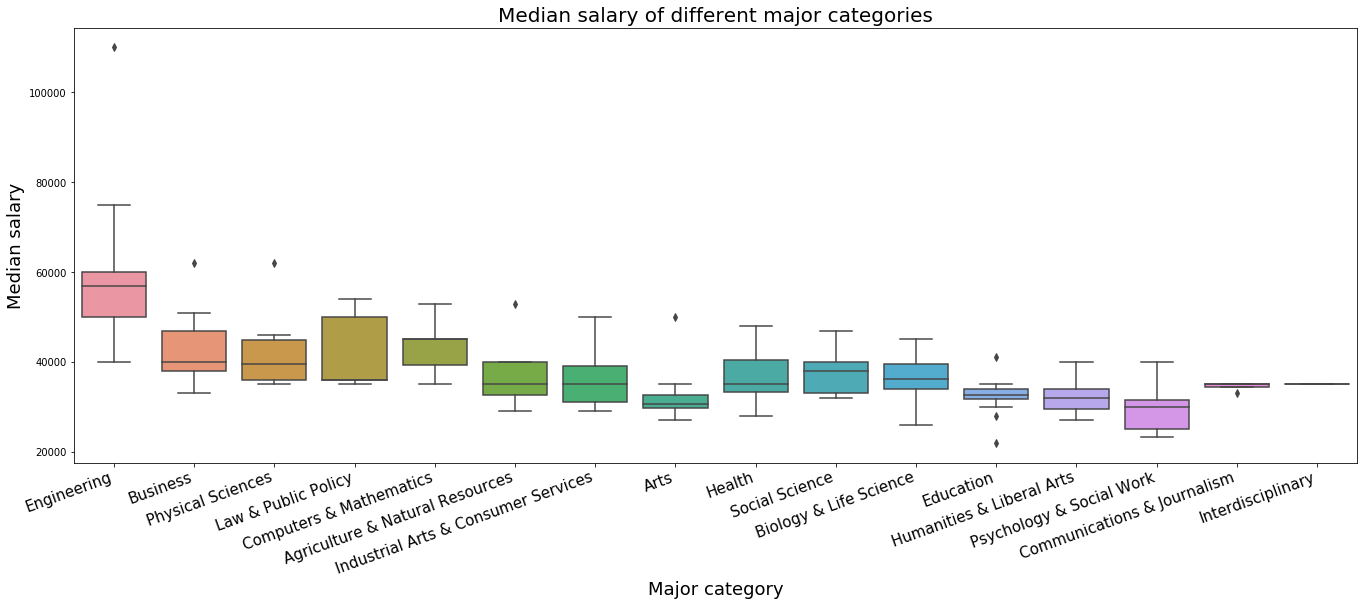

In [14]:
# Plot median salary of different major categories
sns.boxplot(x='Major_category',y='Median',data=resentgrad_df)
plt.xticks(size = 15, rotation=20, horizontalalignment='right')
plt.xlabel('Major category', size=18)
plt.ylabel('Median salary', size=18)
plt.title('Median salary of different major categories',size=20)

By check the median line of all boxplots, engineering majors get highest salary, while students with arts or psychology & social work majors get the lowest salary.

### Petroleum engineering majors earn the most money

Text(0, 0.5, 'Median Salary')

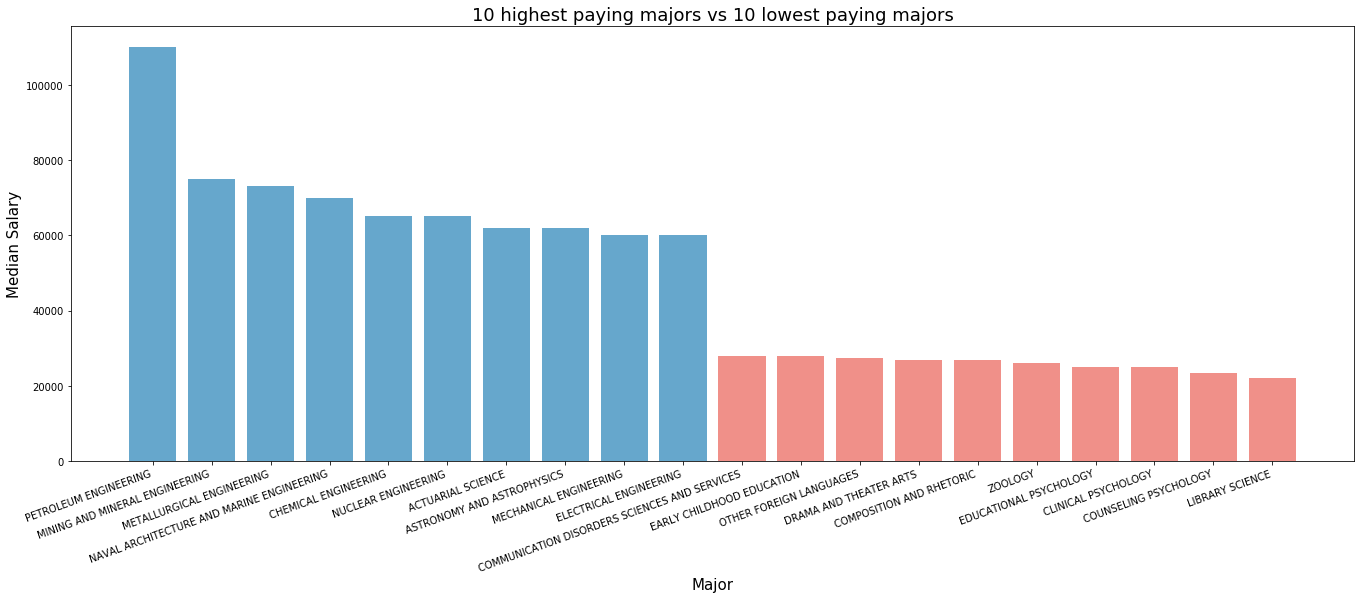

In [15]:
# Top 10 high paying majors vs 10 lowest paying majors

rank10 = resentgrad_df.loc[resentgrad_df['Rank']<=10]
plt.bar(x=rank10['Major'],height=rank10['Median'],color='#66a7cc')
ranklast10 = resentgrad_df.loc[resentgrad_df['Rank']>=164]
plt.bar(x=ranklast10['Major'],height=ranklast10['Median'],color='#f09089')
plt.xticks(rotation=20, horizontalalignment='right')
plt.title('10 highest paying majors vs 10 lowest paying majors',size = 18)
plt.xlabel('Major',size=15)
plt.ylabel('Median Salary', size=15)

The top 10 high paying majors and 10 lowest paying majors from the graph above.

* The median salary of petroleum engineering majors stands out. It is \\$35, 000 higher than that of the mining and mineral majors.
* It is interesting that among the top ten majors, eight out of ten belong to the engineering major category, one is business category and the other one is physical sciences category. It shows that engineering majors get higher salary.
* On the other hand, the lowest ten majors are distributed in education, arts, psychology & social work and humanities categories.

In [16]:
toplast = resentgrad_df[(resentgrad_df['Major']=='PETROLEUM ENGINEERING')|(resentgrad_df['Major']=='LIBRARY SCIENCE')]
toplast

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
172,173,3501,LIBRARY SCIENCE,1098.0,134.0,964.0,Education,0.877960,2,742,...,237,410,87,0.104946,22000,20000,22000,288,338,192


* There are more students majored in petroleum engineering than students who studied library science. 
* Female students are the majority in library science major (87.80%), while only makes up 12.06% in the petroleum engineering major. 
* The unemployment rate is high for students graduated from library science major (10.49%), but low (1.84%) for petroleum engineering major students.
* It shows that students with petroleum engineering majors earn five times more than library science major in median salary.

According to my research, the major of petroleum engineering cultivates talents who can be engaged in engineering design, engineering construction and management, applied research and technology development in oil and gas drilling engineering, oil recovery engineering and other aspects in petroleum engineering field. In recent years, petroleum and coal manufacturing was the largest manufacturing industry in the United States, according to the US Department of Commerce.This major has high requirements for students and is a difficult major with a relatively small number of graduates, so it is easier to find a job with high salary.

### Comparing the starting salary by each major

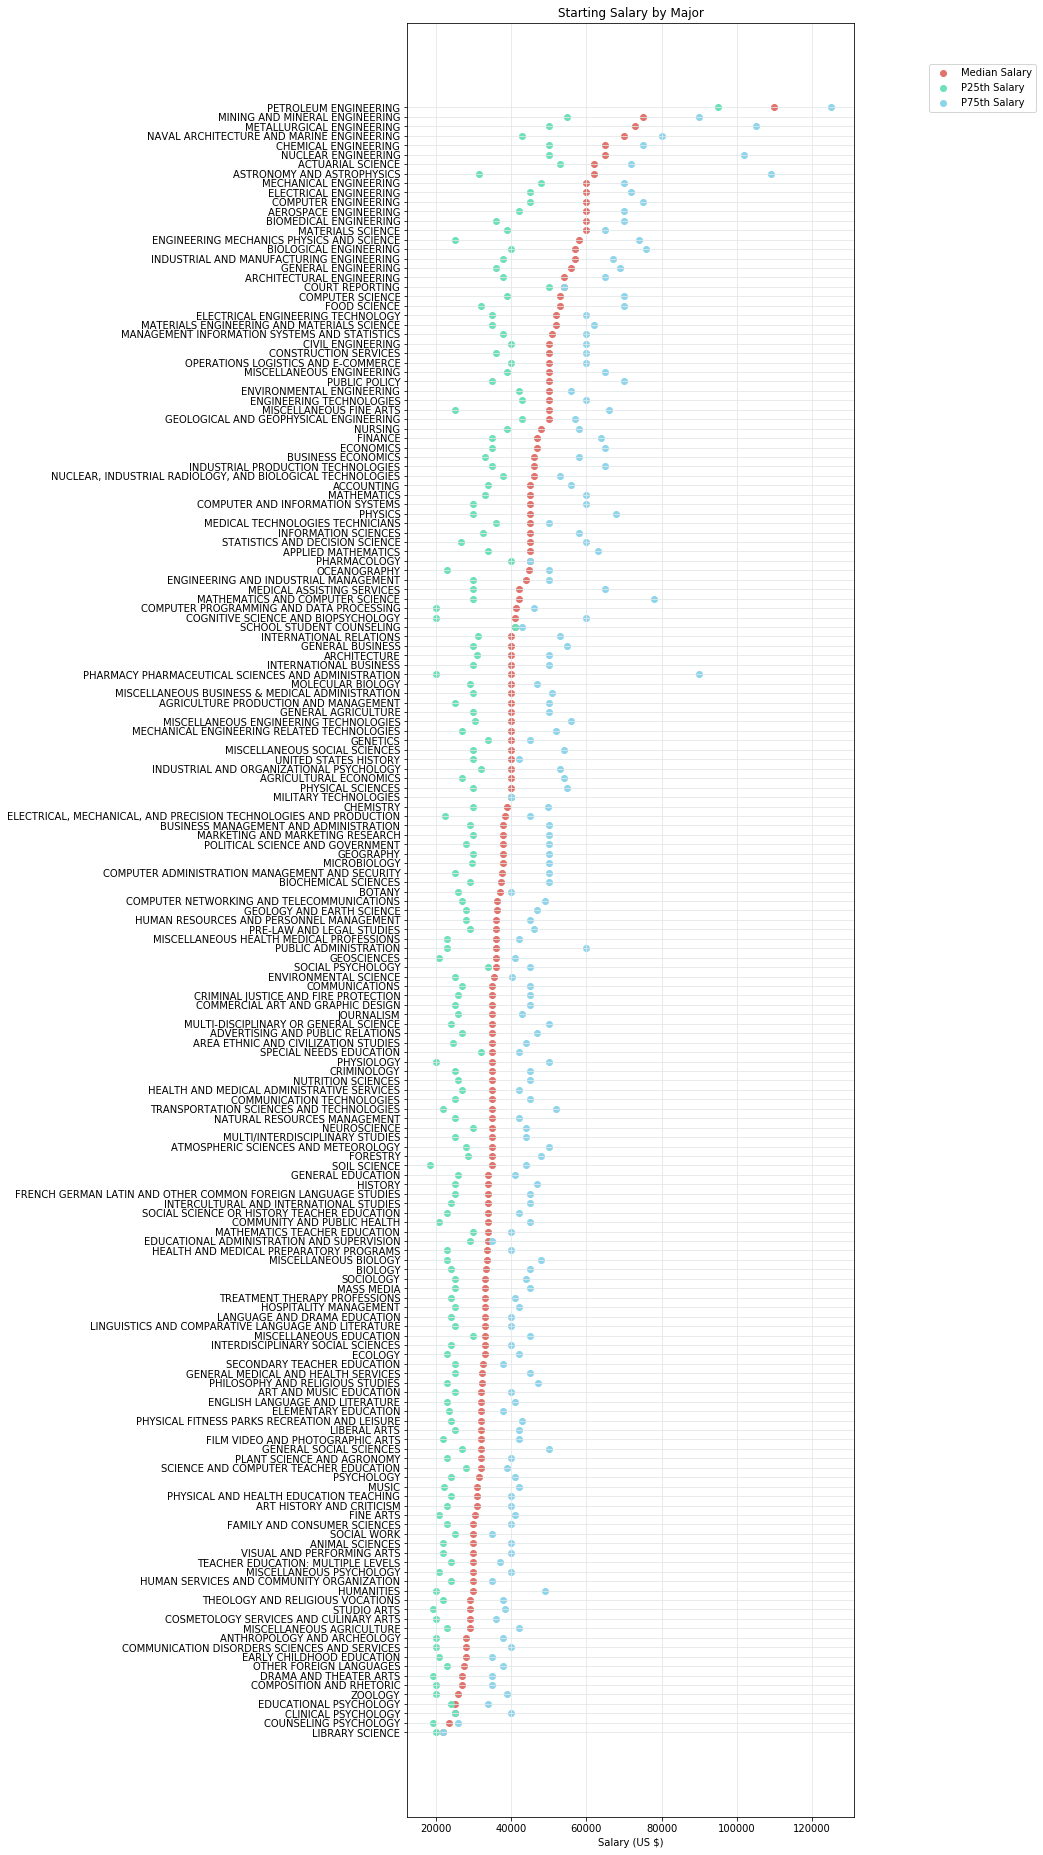

In [17]:
# Plot starting salary by all majors

fig = plt.figure(figsize=(8,33))

plt.scatter(x = resentgrad_df['Median'], y = resentgrad_df['Major'], color='#e0736c', label = 'Median Salary')
plt.scatter(x = resentgrad_df['P25th'], y = resentgrad_df['Major'], color='#6ce0b9', label = 'P25th Salary')
plt.scatter(x = resentgrad_df['P75th'], y = resentgrad_df['Major'], color='#8dd5eb', label = 'P75th Salary')

plt.xlabel('Salary (US $)')
plt.ylabel('')
plt.title('Starting Salary by Major')
plt.legend(loc='upper right', bbox_to_anchor=(1.42,.98))
plt.gca().invert_yaxis()
plt.grid(True,color = '#e3e7e8') 
plt.show()

From the scatter plot above, I got a comparison of salary distributions for new graduates in each major. 

* Some majors have a large range of salary. For example, pharmacy pharmaceutical sciences and administration major in health category ranged from \\$20000 to \\$90000. Students who studied astronomy and astrophysics major also have large income gap, ranging from\\$31500 to \\$109000.

* Surprisingly,  the p25th salary of students in petroleum engineering major earn  more than the vast majority of majors in their p75% salary.

* It is more clear to see from this chart that the top 20 highest-earning majors are mostly engineering students.
* The higher the salary, the wider the range.


Astronomy & Astrophysics is the study of planets, stars, galaxies, and the universe.  The salary depends upon the candidate's skills, educational level, and previous experience. It is hard for some students to get a high pay job when they just graduate. Since there are not such big demands for this major as other majors, some students might change their career path. This might be the reason why the salary of this major has such a big gap.

### Majority unemployment rate is 6%~7% 

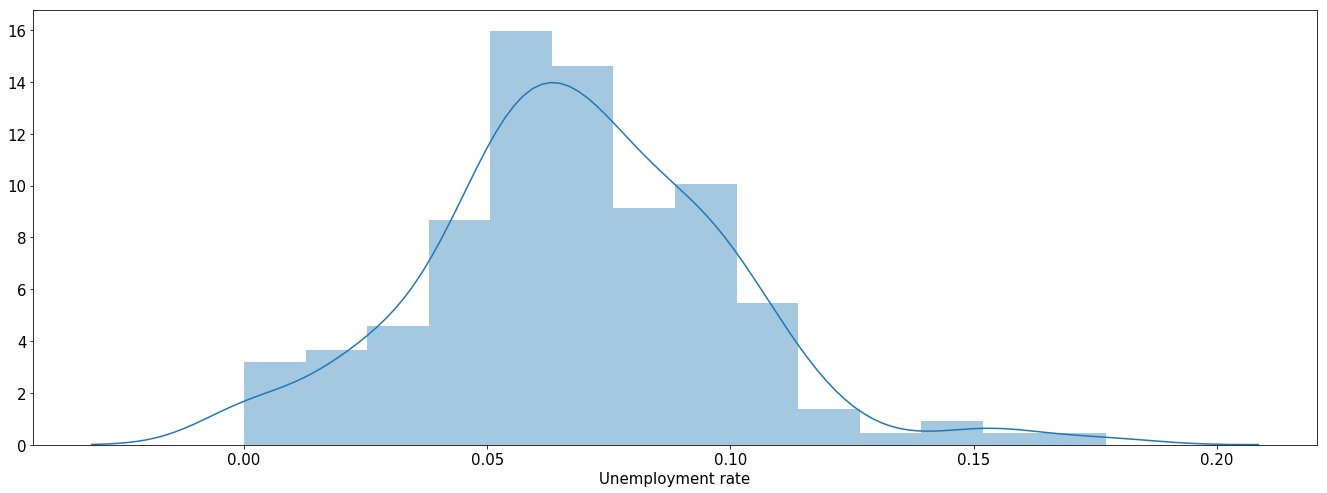

In [18]:
# Exploring unemployment rate
sns.distplot(resentgrad_df['Unemployment_rate'])
plt.xlabel('Unemployment rate',size=15)
plt.ylabel('', size=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

The majority of unemplyment rate for most recent graduates is 6%.

Text(0.5, 1.0, 'Unemployment rate of different major categories')

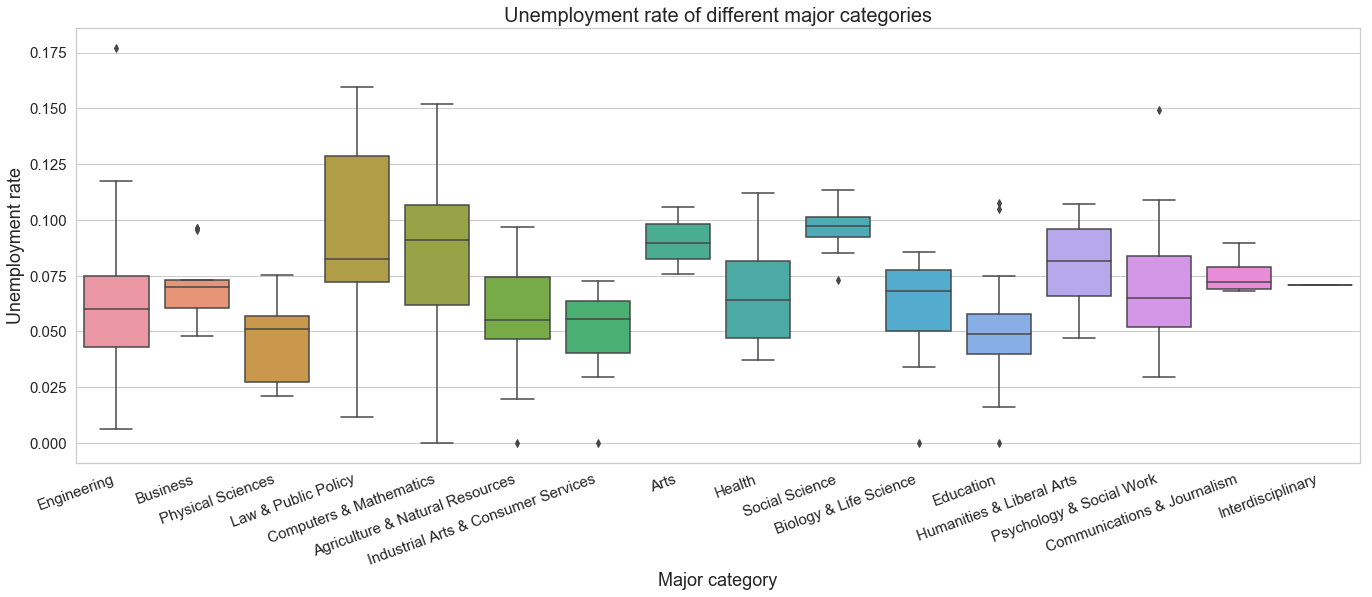

In [19]:
# Plot unemployment rate of different major categories
sns.set(style="whitegrid", palette="pastel", color_codes=True)
sns.boxplot(x='Major_category',y='Unemployment_rate',data=resentgrad_df)
plt.xticks(size = 15, rotation=20, horizontalalignment='right')
plt.yticks(size=15)
plt.xlabel('Major category', size=18)
plt.ylabel('Unemployment rate', size=18)
plt.title('Unemployment rate of different major categories',size=20)

* The unemployment rate of some major categoties range widely, such as engineering, law & public policy, and computers & mathematics. Those majors seem popular among students, but still hard to say it is definitely can find a job after graduation.

* There are some outliers in the chart which shows that some majors in the category are different from majority employment situation. Some unemployment rates are really high some are very low.

### Some engineering majors have a high unemployment rate 

In [20]:
# Sort values by unemployment rate
unemploy_df = resentgrad_df.sort_values(by = 'Unemployment_rate', ascending = False)
unemploy_df.head(10)

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
5,6,2418,NUCLEAR ENGINEERING,2573.0,2200.0,373.0,Engineering,0.144967,17,1857,...,264,1449,400,0.177226,65000,50000,102000,1142,657,244
89,90,5401,PUBLIC ADMINISTRATION,5629.0,2947.0,2682.0,Law & Public Policy,0.476461,46,4158,...,847,2952,789,0.159491,36000,23000,60000,919,2313,496
84,85,2107,COMPUTER NETWORKING AND TELECOMMUNICATIONS,7613.0,5291.0,2322.0,Computers & Mathematics,0.305005,97,6144,...,1447,4369,1100,0.151850,36400,27000,49000,2593,2941,352
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,...,648,1293,368,0.149048,25000,25000,40000,986,870,622
29,30,5402,PUBLIC POLICY,5978.0,2639.0,3339.0,Law & Public Policy,0.558548,55,4547,...,1306,2776,670,0.128426,50000,35000,70000,1550,1871,340
105,106,2001,COMMUNICATION TECHNOLOGIES,18035.0,11431.0,6604.0,Computers & Mathematics,0.366177,208,14779,...,4690,9085,2006,0.119511,35000,25000,45000,4545,8794,2495
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
53,54,2101,COMPUTER PROGRAMMING AND DATA PROCESSING,4168.0,3046.0,1122.0,Computers & Mathematics,0.269194,43,3257,...,482,2453,419,0.113983,41300,20000,46000,2024,1033,263
79,80,5504,GEOGRAPHY,18480.0,11404.0,7076.0,Social Science,0.382900,179,14057,...,5651,8628,1799,0.113459,38000,30000,50000,5350,6830,1905
58,59,1401,ARCHITECTURE,46420.0,25463.0,20957.0,Engineering,0.451465,362,34158,...,10206,20026,4366,0.113332,40000,31000,50000,16178,13724,4221


* It is surprising that some engineering majors have a high unemployment rate, such as nuclear engineering, mining and mineral engineering, and architecture majors.

* I am also suprised that some students with computers & mathematics backgrounds can't find a job  when they just graduated.

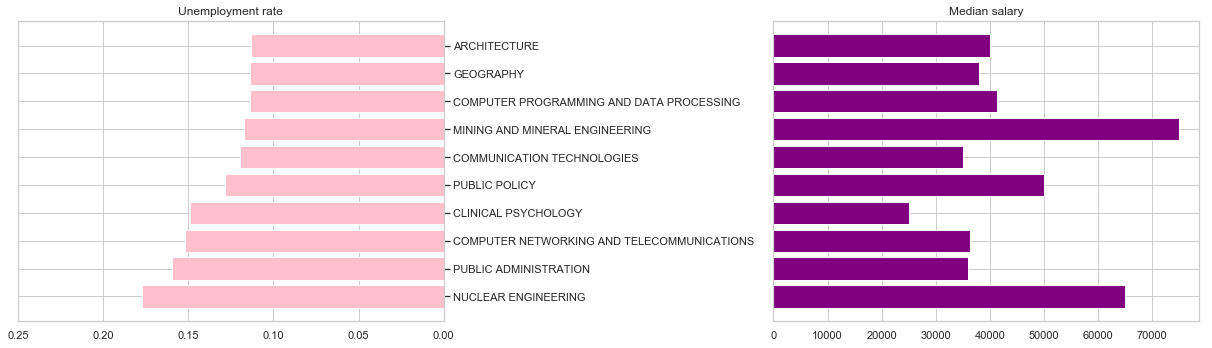

In [38]:
# Choose the top ten unemployment majors as a new dataframe
unemploytop10 = unemploy_df.iloc[:10]

# Plot two horizontal bar charts
fig, axes = plt.subplots(ncols=2, sharey=True, figsize=(17,5))
axes[0].barh(unemploytop10['Major'], unemploytop10['Unemployment_rate'], align='center', color='pink')
axes[0].set(title='Unemployment rate')
axes[0].set_xticks([0,0.05,0.1,0.15,0.2,0.25])
axes[1].barh(unemploytop10['Major'], unemploytop10['Median'], align='center', color='purple')
axes[1].set(title='Median salary')
axes[0].invert_xaxis()
axes[0].yaxis.tick_right()
plt.tight_layout()

plt.show()

* Some engineering majors have high median salary, but the unemployment rates are also high, such as nuclear engineering and mining & mineral engineering majors. It shows that a high paying major doesn't mean everybody can get a job in that industry.

* From the 10 lowest median paying majors shown above, only clinical psychology major appears in the list of the top 10 unemployment rate majors.

### More women get higher education

In [22]:
table = resentgrad_df.pivot_table(index = 'Major_category', values = ['Men','Women']).round()
table

,Men,Women
Major_category,,
Agriculture & Natural Resources,4484.0,3918.0
Arts,16799.0,27842.0
Biology & Life Science,13208.0,19210.0
Business,51373.0,48810.0
Communications & Journalism,32980.0,65170.0
Computers & Mathematics,18975.0,8208.0
Education,6470.0,28475.0
Engineering,14080.0,4458.0
Health,6293.0,32309.0


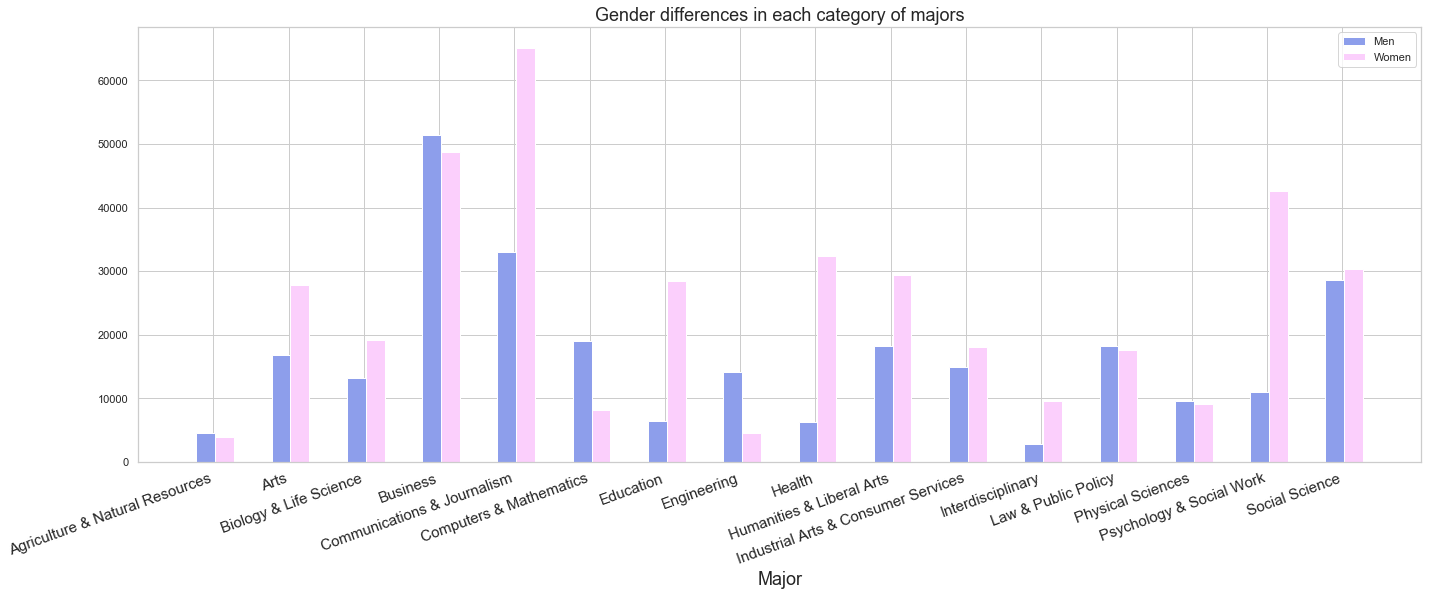

In [23]:
barWidth = 0.25

# Set position of bar on X axis
r1 = np.arange(len(table['Men']))
r2 = [x + barWidth for x in r1]

# Make the plot
plt.bar(r1, table['Men'], color = '#8d9eeb', width=barWidth, edgecolor='white', label='Men')
plt.bar(r2, table['Women'], color = '#fbcffc', width=barWidth, edgecolor='white', label='Women')

# Add xticks on the middle of the group bars
plt.xlabel('Major', size=18)
plt.xticks([r + 0.1 for r in range(len(table['Men']))], table.index)
plt.xticks(size = 15, rotation=20, horizontalalignment='right')

# Create legend, title & Show graphic
plt.title('Gender differences in each category of majors', size=18)
plt.legend()
plt.show()


* It is abvious that women are the majority in arts, communications & journalism, health, humanities & liberal arts and physical sciences majors.

* More male students study computers & mathematics and engineering majors.

* There are nor big differences in agriculture & natural resources, law & public policy, physical sciences and social science majors.

# 3. Understanding the overall employment situation

In [24]:
allages_df.head(3)

,Major_code,Major,Major_category,Total,Employed,Employed_full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th
0,1100,GENERAL AGRICULTURE,Agriculture & Natural Resources,128148,90245,74078,2423,0.026147,50000,34000,80000.0
1,1101,AGRICULTURE PRODUCTION AND MANAGEMENT,Agriculture & Natural Resources,95326,76865,64240,2266,0.028636,54000,36000,80000.0
2,1102,AGRICULTURAL ECONOMICS,Agriculture & Natural Resources,33955,26321,22810,821,0.030248,63000,40000,98000.0


In [25]:
# Check missing values
allages_df.isnull().sum()

Major_code                       0
Major                            0
Major_category                   0
Total                            0
Employed                         0
Employed_full_time_year_round    0
Unemployed                       0
Unemployment_rate                0
Median                           0
P25th                            0
P75th                            0
dtype: int64

In [26]:
allages_df.describe()

,Major_code,Total,Employed,Employed_full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th
count,173.000000,1.730000e+02,1.730000e+02,1.730000e+02,173.000000,173.000000,173.000000,173.000000,173.000000
mean,3879.815029,2.302566e+05,1.661620e+05,1.263078e+05,9725.034682,0.057355,56816.184971,38697.109827,82506.358382
std,1687.753140,4.220685e+05,3.073244e+05,2.424254e+05,18022.040192,0.019177,14706.226865,9414.524761,20805.330126
min,1100.000000,2.396000e+03,1.492000e+03,1.093000e+03,0.000000,0.000000,35000.000000,24900.000000,45800.000000
25%,2403.000000,2.428000e+04,1.728100e+04,1.272200e+04,1101.000000,0.046261,46000.000000,32000.000000,70000.000000
50%,3608.000000,7.579100e+04,5.656400e+04,3.961300e+04,3619.000000,0.054719,53000.000000,36000.000000,80000.000000
75%,5503.000000,2.057630e+05,1.428790e+05,1.110250e+05,8862.000000,0.069043,65000.000000,42000.000000,95000.000000
max,6403.000000,3.123510e+06,2.354398e+06,1.939384e+06,147261.000000,0.156147,125000.000000,78000.000000,210000.000000


* The unemployment rate ranged from 0% to 15.61%. 
* The median wage ranges from \\$35000 to \\$125000, which was higher than that of new graduats.
* The unemployment rate for all people ranges from 0% to 15.61%. The average unemployment rate is 5.74%.

In [27]:
# Sort values by median salary
allagenew = allages_df.sort_values(by = 'Median', ascending = False)
allagenew.head(10)

,Major_code,Major,Major_category,Total,Employed,Employed_full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th
59,2419,PETROLEUM ENGINEERING,Engineering,19631,14002,11636,617,0.042205,125000,75000,210000.0
154,6108,PHARMACY PHARMACEUTICAL SCIENCES AND ADMINISTR...,Health,180084,124058,89234,4414,0.034358,106000,78000,125000.0
57,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,Engineering,16094,10690,9226,449,0.040309,97000,60000,125000.0
55,2415,METALLURGICAL ENGINEERING,Engineering,12818,6939,5462,326,0.044873,96000,65000,123000.0
58,2418,NUCLEAR ENGINEERING,Engineering,9826,7320,6474,527,0.067159,95000,65000,128000.0
56,2416,MINING AND MINERAL ENGINEERING,Engineering,10746,7416,6419,366,0.047032,92000,52000,124000.0
97,4005,MATHEMATICS AND COMPUTER SCIENCE,Computers & Mathematics,7184,5874,5039,150,0.024900,92000,53000,136000.0
48,2408,ELECTRICAL ENGINEERING,Engineering,671647,489965,422317,26064,0.050509,88000,60000,116000.0
45,2405,CHEMICAL ENGINEERING,Engineering,188046,131697,109406,6388,0.046261,86000,60000,120000.0
51,2411,GEOLOGICAL AND GEOPHYSICAL ENGINEERING,Engineering,6264,4120,3350,0,0.000000,85000,55000,125000.0


###  Median salary for all employees are higher than new grads

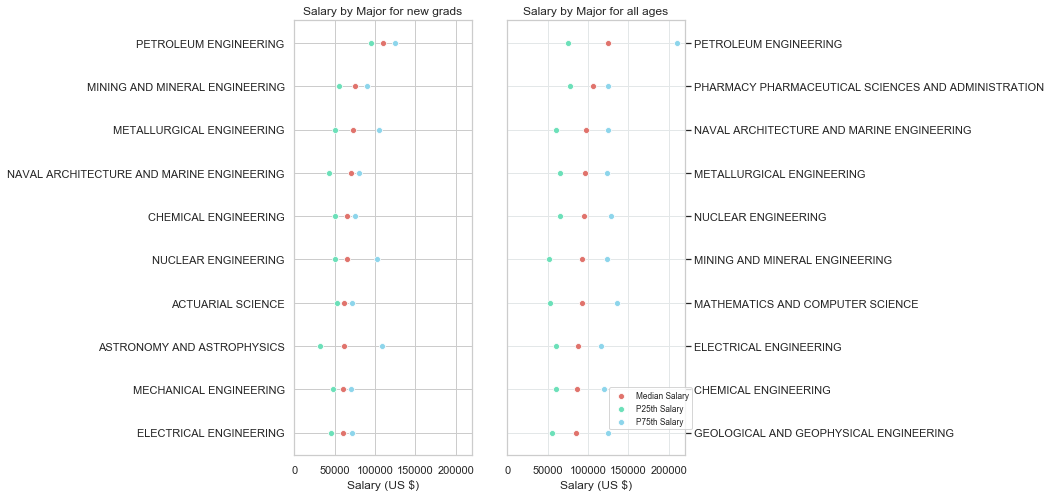

In [28]:
# Compare top ten median salary for new graduates vs all ages empolyees

fig = plt.figure(figsize=(7,8))
plt.subplot(1,2,1)
sns.scatterplot(x = rank10['Median'], y = rank10['Major'], color='#e0736c')
sns.scatterplot(x = rank10['P25th'], y = rank10['Major'], color='#6ce0b9')
sns.scatterplot(x = rank10['P75th'], y = rank10['Major'], color='#8dd5eb')
plt.title('Salary by Major for new grads')
plt.xlabel('Salary (US $)')
plt.xlim([0,220000])
plt.gca().invert_yaxis()
plt.ylabel('')

plt.subplot(1,2,2)
rank10allage = allagenew.iloc[:10]
ax = sns.scatterplot(x = rank10allage['Median'], y = rank10allage['Major'], color='#e0736c', label = 'Median Salary')
ax = sns.scatterplot(x = rank10allage['P25th'], y = rank10allage['Major'], color='#6ce0b9', label = 'P25th Salary')
ax = sns.scatterplot(x = rank10allage['P75th'], y = rank10allage['Major'], color='#8dd5eb', label = 'P75th Salary')
ax.yaxis.tick_right()
ax.yaxis.set_label_position("right")
plt.xlim([0,220000])

plt.xlabel('Salary (US $)')
plt.ylabel('')
plt.title('Salary by Major for all ages')
plt.legend(loc='lower left', bbox_to_anchor=(0.55,0.05),fontsize = 'x-small')
plt.gca().invert_yaxis()
plt.grid(True,color = '#e3e7e8') 
plt.show()

* Majority of people with Petroleum engineering background get the highest salary no matter whether he/she is recent graduate or not.

* Recent graduates tend to earn lower salaries compare with the overall job market.

* Except for students in pharmacy pharmaceutical sciences & administration major or mathematics & computer science major, all other top eight high paying majors are in engineering major category. 

* Top ten high paying majors for the whole employment market is different from the top ten majors for new graduations. 

* It tells that students need to have a long-term view and not just focus on the salary for the first job.

# 4. Does a master's degree have an advantage?

In [29]:
grad_df.head(5)

,Major_code,Major,Major_category,Grad_total,Grad_sample_size,Grad_employed,Grad_full_time_year_round,Grad_unemployed,Grad_unemployment_rate,Grad_median,...,Nongrad_total,Nongrad_employed,Nongrad_full_time_year_round,Nongrad_unemployed,Nongrad_unemployment_rate,Nongrad_median,Nongrad_P25,Nongrad_P75,Grad_share,Grad_premium
0,5601,CONSTRUCTION SERVICES,Industrial Arts & Consumer Services,9173,200,7098,6511,681,0.087543,75000.0,...,86062,73607,62435,3928,0.050661,65000.0,47000,98000.0,0.096320,0.153846
1,6004,COMMERCIAL ART AND GRAPHIC DESIGN,Arts,53864,882,40492,29553,2482,0.057756,60000.0,...,461977,347166,250596,25484,0.068386,48000.0,34000,71000.0,0.104420,0.250000
2,6211,HOSPITALITY MANAGEMENT,Business,24417,437,18368,14784,1465,0.073867,65000.0,...,179335,145597,113579,7409,0.048423,50000.0,35000,75000.0,0.119837,0.300000
3,2201,COSMETOLOGY SERVICES AND CULINARY ARTS,Industrial Arts & Consumer Services,5411,72,3590,2701,316,0.080901,47000.0,...,37575,29738,23249,1661,0.052900,41600.0,29000,60000.0,0.125878,0.129808
4,2001,COMMUNICATION TECHNOLOGIES,Computers & Mathematics,9109,171,7512,5622,466,0.058411,57000.0,...,53819,43163,34231,3389,0.072800,52000.0,36000,78000.0,0.144753,0.096154


### Unempolyment rate for graduate students is lower than non-graduate students

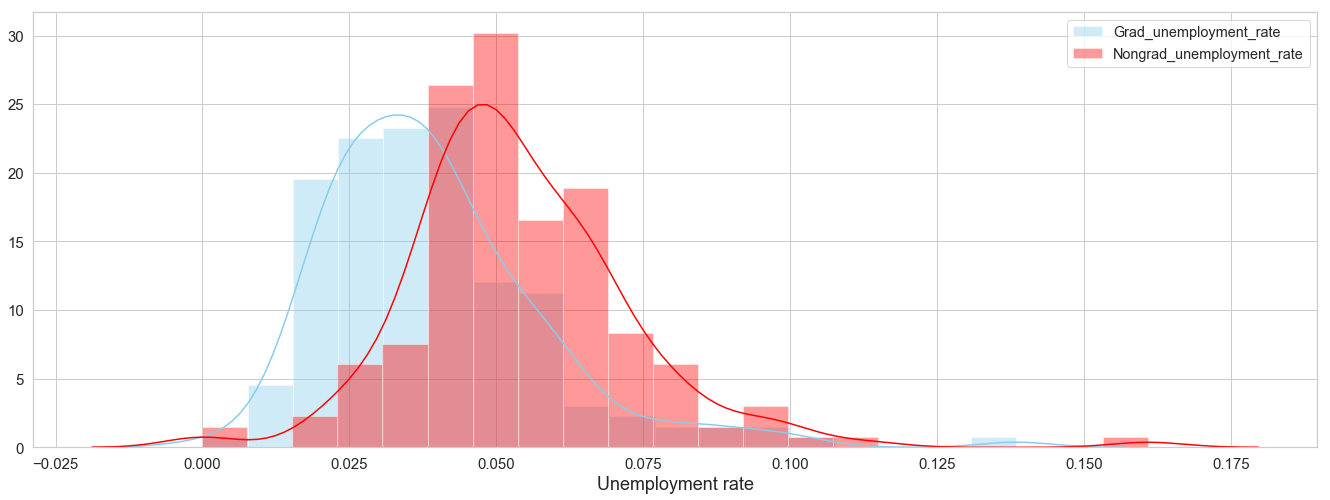

In [30]:
sns.distplot(grad_df["Grad_unemployment_rate"] , color="skyblue", label="Grad_unemployment_rate")
sns.distplot(grad_df["Nongrad_unemployment_rate"] , color="red", label="Nongrad_unemployment_rate")

plt.legend(fontsize="large")
plt.xlabel('Unemployment rate',size = 18)
plt.ylabel('')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

* Overall, the distribution of unempolyment rate for graduate students is lower than non-graduate students.

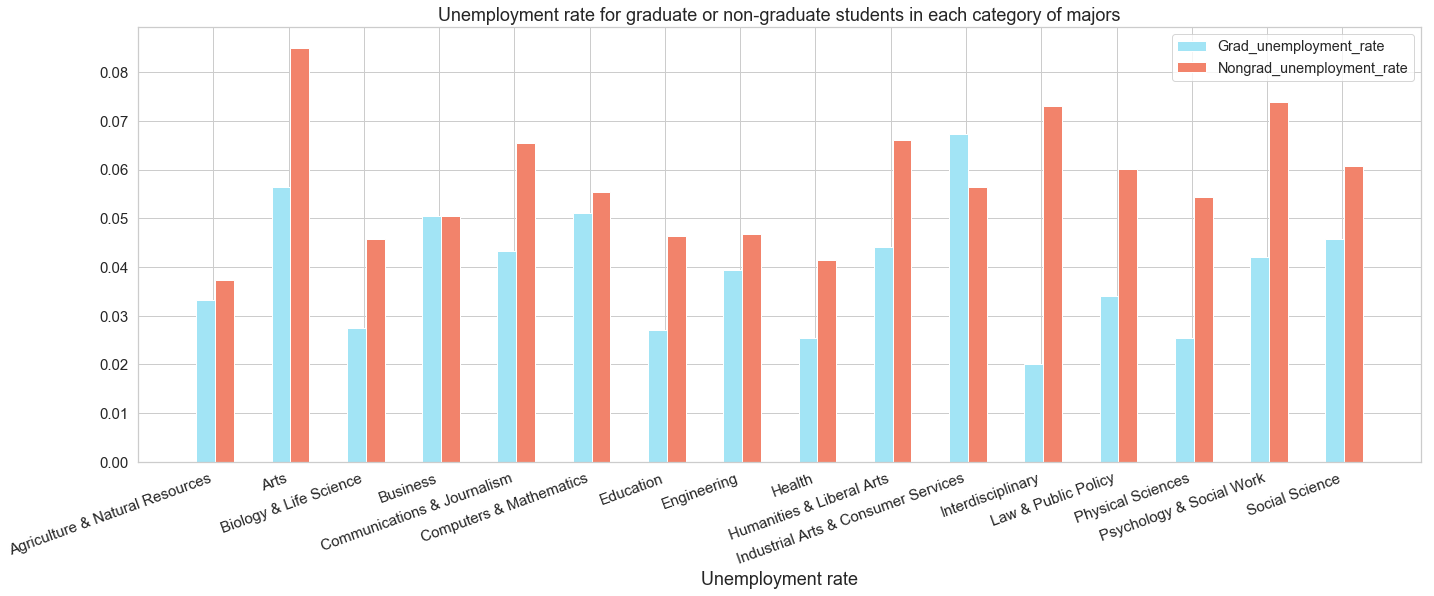

In [31]:
# Make a new table
table1 = grad_df.pivot_table(index = 'Major_category', values = ['Grad_unemployment_rate','Nongrad_unemployment_rate'])

# Plot the comparation of unemployment rate
barWidth = 0.25

# Set position of bar on X axis
r3 = np.arange(len(table1['Grad_unemployment_rate']))
r4 = [x1 + barWidth for x1 in r3]

# Make the plot
plt.bar(r3, table1['Grad_unemployment_rate'], color = '#a2e4f5', width=barWidth, edgecolor='white', label='Grad_unemployment_rate')
plt.bar(r4, table1['Nongrad_unemployment_rate'], color = '#f2836b', width=barWidth, edgecolor='white', label='Nongrad_unemployment_rate')

# Add xticks on the middle of the group bars
plt.xlabel('Unemployment rate', size=18)
plt.xticks([r + 0.1 for r in range(len(table1['Grad_unemployment_rate']))], table1.index)
plt.xticks(size = 15, rotation=20, horizontalalignment='right')
plt.yticks(size = 15)
# Create legend, title & Show graphic
plt.title('Unemployment rate for graduate or non-graduate students in each category of majors', size=18)
plt.legend(fontsize='large')
plt.show()

* Unemployment rate for graduate or non-graduate students in business major category are basically the same.

* The unemployment rate of most non-graduate majors is higher than that of graduate majors.

* Only for industrial arts & consumer services major category, graduate students have a higher unemployment rate.

* The biggest difference in interdisciplinary major.

### Most people get a higher salary with a master's degree

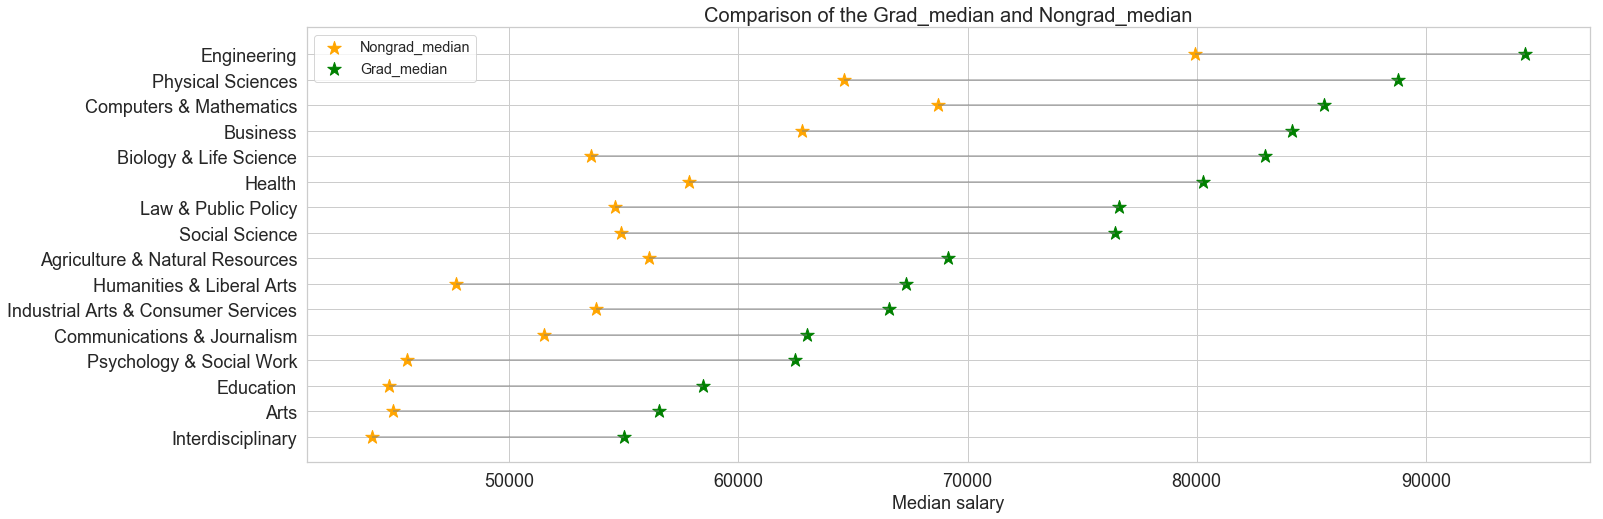

In [32]:

# Reorder it following the values of the first value
table2 = grad_df.pivot_table(index = 'Major_category', values = ['Grad_median','Nongrad_median'])
ordered_df = table2.sort_values(by='Grad_median')
my_range=range(1,len(table2.index)+1)

plt.hlines(y=my_range, xmin=ordered_df['Nongrad_median'], xmax=ordered_df['Grad_median'], color='grey', alpha=0.6)
plt.scatter(ordered_df['Nongrad_median'], my_range, color='orange', alpha=1, marker='*',s=200, label='Nongrad_median')
plt.scatter(ordered_df['Grad_median'], my_range, color='green', alpha=1, marker='*', s=200, label='Grad_median')
plt.legend(fontsize='large')

# Add title and axis names
plt.yticks(my_range, ordered_df.index)
plt.title("Comparison of the Grad_median and Nongrad_median", size=20)
plt.xlabel('Median salary', size = 18)
plt.ylabel('')
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
plt.show()

* It is clear that the median salary of students with a graduate degree has a higher salary compared with students without the graduate degree.

* Compared with other majors, students with master's degree in biology & life science majors get the biggest pay raise.

# Conclusions:

Choosing a good major has a great influence on future career development. It depends on you whether you prefer choosing a major based on your interests or the income. You may be interested in art, but according to my research, artists earn far less than engineering majors. I hope my research can provide a reference for students and parents, and also offer insights for the education experts, sociologists, economists, and employers.

Here are some main findings:

* The average median salary for all new graduates is \\$40151 annually. However, there are big differences between majors. Engineering majors earn the most overall, while students with arts or psychology & social work majors get the lowest salary. Meanwhile, some majors have a large range of salary.

* It is hard to say which major categories are definitly equal high or low paying jobs.

* The average unemployment rate for new graduates is 6.82%. High income does not mean high employment. It is surprising that some engineering majors have a high unemployment rate, such as nuclear engineering, mining and mineral engineering, and architecture majors. It shows that a high paying major doesn't mean everybody can get a job in that industry.

* Some students with computers & mathematics backgrounds can't find a job when they just graduate.
This also confirms the story I wrote about the software development major graduates couldn’t find a job last year. According to the advice of experts I interviewed, graduates can first choose small companies to accumulate experience; Or continue to study for an advanced degree.

* I am glad to see more women choose to get higher education. It is obvious that women are the majority in arts, communications & journalism, health, humanities & liberal arts and physical sciences majors. 

* For the overall job market, the median salary is higher than that for the new graduates. Students need to have a long-term view and not just focus on the salary for the first job. Majority of people with Petroleum engineering background get the highest salary no matter whether he/she is a recent graduate or not. 

* A graduate degree is useful. The average unemployment rate is lower than that of undergraduates, and the average salary is higher than that of undergraduates.